## Ali Seymen ALKARA
## asalkara@gmail.com
### Deadline: 08/12/2020 9:00 GMT + 3¶

## Homework

* Import Boston Dataset from Sklearn Dataset class
* Explore and analyse raw data.
* Do preprocessing for regression quest.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Build Ridge Regression model with at least 5 different alpha value. (Use GridSearchCV to tune your model)
* Is there any overfitting and underfitting?
* Evaluate your result. 

In [1]:
data = sklearn.datasets.load_boston(*, return_X_y=False)
data.head()

SyntaxError: invalid syntax (<ipython-input-1-ba8e436784de>, line 1)

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.head()

AttributeError: head

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

boston_pd = pd.DataFrame(boston.data)
boston_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_pd.columns = boston.feature_names
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [26]:
boston_pd.info() # all features are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


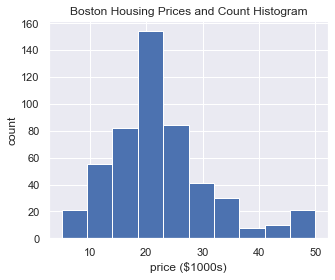

In [17]:
plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

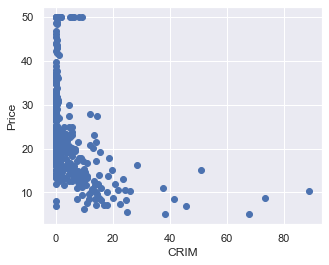

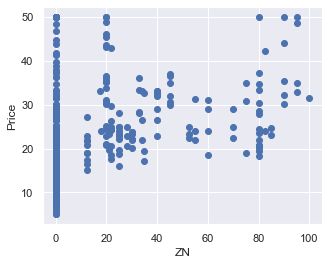

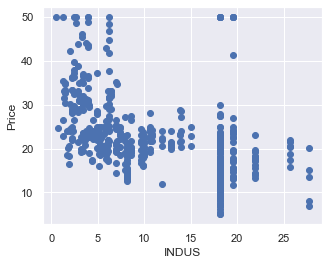

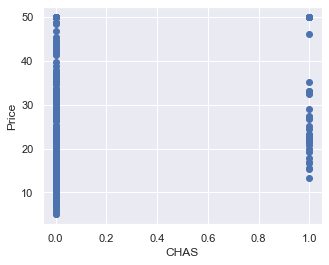

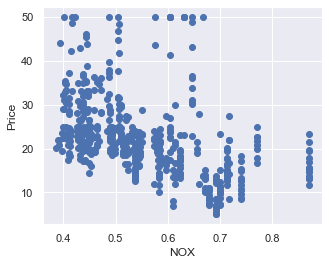

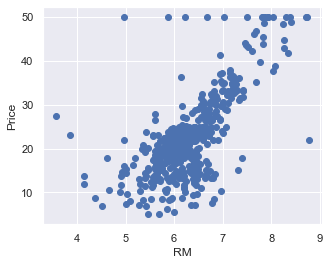

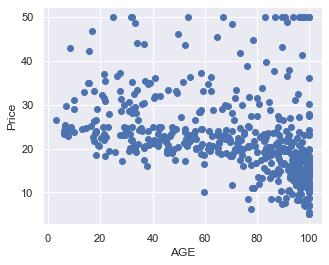

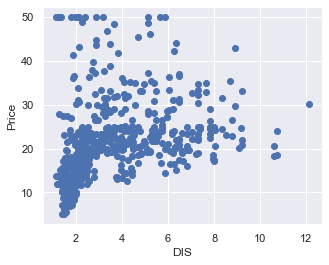

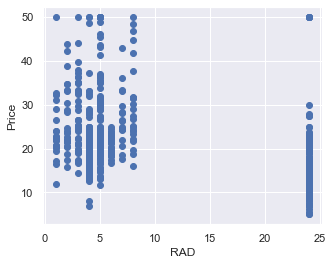

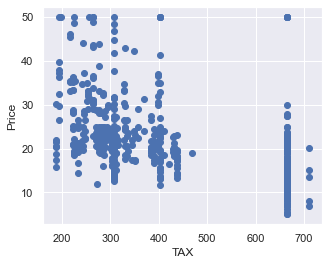

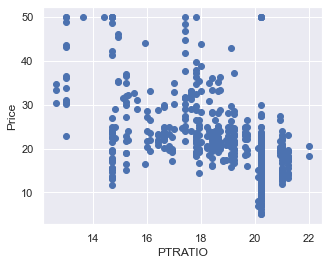

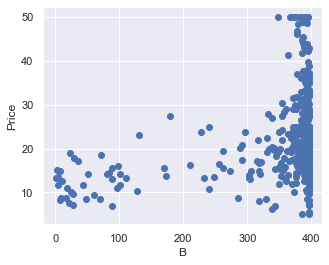

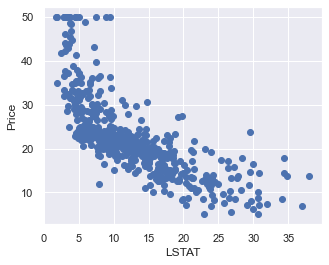

In [18]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

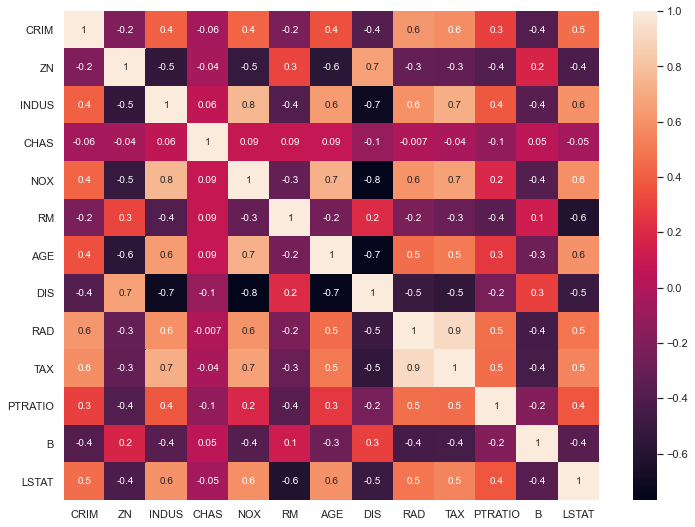

In [10]:
sns.set(rc={'figure.figsize':(12,9)})

sns.heatmap(boston_pd.corr(), annot = True, fmt='.1g', annot_kws={"size": 10})

In [13]:
# there are no missing values
for i in range(len(boston_pd.columns)):
    print(boston_pd.iloc[:,i].isna().sum()) 

0
0
0
0
0
0
0
0
0
0
0
0
0


In [14]:
boston_pd.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [19]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [20]:
X = boston_pd
y = boston.target

In [21]:
# scaling for linear regression needed
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

X_ms = MinMaxScaler().fit_transform(X)
X_rs = RobustScaler().fit_transform(X)
X_ss = StandardScaler().fit_transform(X)

#Scaling the data (Standardization)
"""
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scaled data into dataframe

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns) #ideally train, test data should be in columns
"""
X_ss

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [24]:
from sklearn.model_selection import train_test_split
#Split into train, test set
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.30, random_state = 42)
X_train.shape

(354, 13)

In [ ]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha = 0.02)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')
#As the data has 10 columns hence 10 coefficients appear here 

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate

In [31]:
# bu cross-validation, GridSearchCV değil!

models = Ridge(alpha = 0.02,random_state=42)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7145433906794966
Test accuracy: 0.7053973101352946


In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1] }

reg = GridSearchCV(Ridge(random_state=42),param_dict,cv=3,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(reg.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(reg.best_score_))
print("Train Score {:.6f}".format(reg.score(X_train,y_train)))
print("Test Score {:.6f}".format(reg.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(reg.refit_time_))

Tuned: {'alpha': 1}
Mean of the cv scores is 0.714852
Train Score 0.743482
Test Score 0.710809
Seconds used for refitting the best model on the train dataset: 0.000998


In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {'alpha': [1, 2, 5, 10, 20, 50, 100] }

reg = GridSearchCV(Ridge(random_state=42),param_dict,cv=3,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(reg.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(reg.best_score_))
print("Train Score {:.6f}".format(reg.score(X_train,y_train)))
print("Test Score {:.6f}".format(reg.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(reg.refit_time_))

Tuned: {'alpha': 5}
Mean of the cv scores is 0.715386
Train Score 0.743145
Test Score 0.709192
Seconds used for refitting the best model on the train dataset: 0.000997


In [36]:
reg.best_estimator_

Ridge(alpha=5, random_state=42)

In [37]:
from sklearn import metrics as met

def plot_learning_curve(est, X_train, y_train, X_test, y_test):
  train_values = []
  test_values = []
  x_values = range(10, len(X_train), 10)
  for i in x_values:
    est.fit(X_train[:i], y_train[:i])

    y_pred = est.predict(X_train[:i])
    train_score = met.mean_squared_error(y_train[:i], y_pred, squared=False)
    train_values.append(train_score)

    y_pred = est.predict(X_test)
    test_score = met.mean_squared_error(y_test, y_pred, squared=False)
    test_values.append(test_score)
  
  plt.plot(x_values, train_values, label="train")
  plt.plot(x_values, test_values, label="test")
  plt.legend()
  plt.title("Learning Curve for " + est.__class__.__name__)
  plt.show()

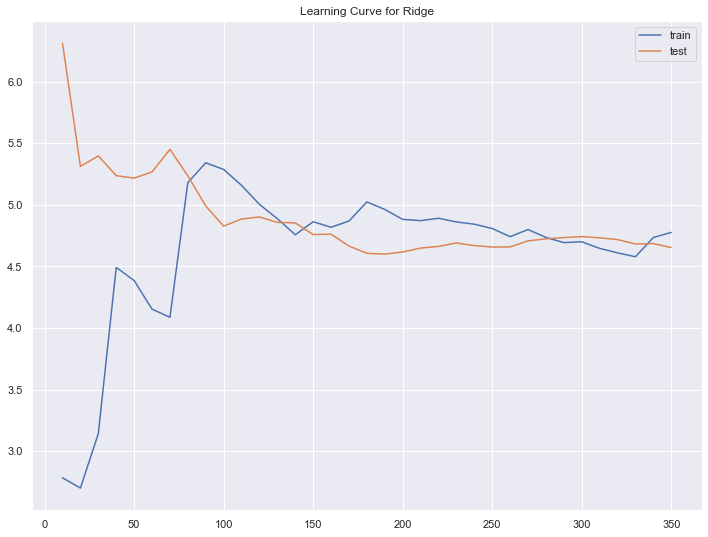

In [38]:
plot_learning_curve(reg.best_estimator_, X_train, y_train, X_test, y_test) # underfitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_ms, y, test_size = 0.30, random_state = 42)

In [40]:
param_dict = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 3, 2, 5, 10, 20, 50, 100] }

reg = GridSearchCV(Ridge(random_state=42),param_dict,cv=3,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(reg.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(reg.best_score_))
print("Train Score {:.6f}".format(reg.score(X_train,y_train)))
print("Test Score {:.6f}".format(reg.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(reg.refit_time_))

Tuned: {'alpha': 0.2}
Mean of the cv scores is 0.715595
Train Score 0.743190
Test Score 0.712456
Seconds used for refitting the best model on the train dataset: 0.000997


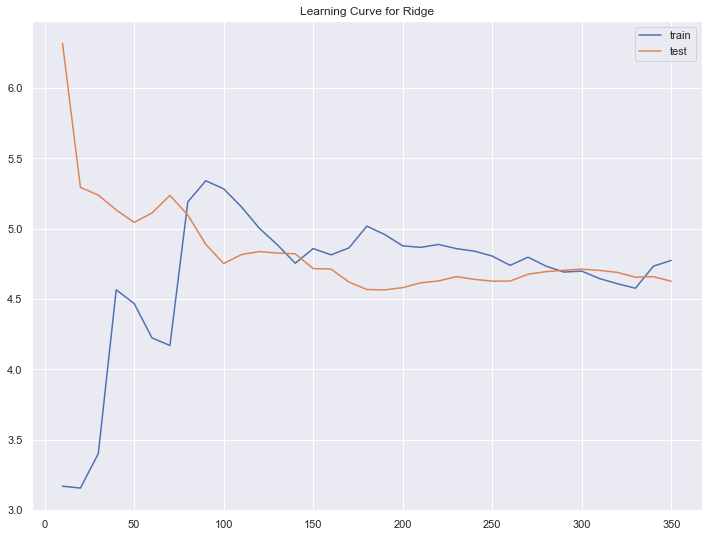

In [41]:
plot_learning_curve(reg.best_estimator_, X_train, y_train, X_test, y_test) # underfitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y, test_size = 0.30, random_state = 42)

In [43]:
param_dict = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 3, 2, 5, 10, 20, 50, 100] }

reg = GridSearchCV(Ridge(random_state=42),param_dict,cv=3,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(reg.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(reg.best_score_))
print("Train Score {:.6f}".format(reg.score(X_train,y_train)))
print("Test Score {:.6f}".format(reg.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(reg.refit_time_))

Tuned: {'alpha': 3}
Mean of the cv scores is 0.715541
Train Score 0.742374
Test Score 0.705155
Seconds used for refitting the best model on the train dataset: 0.001004


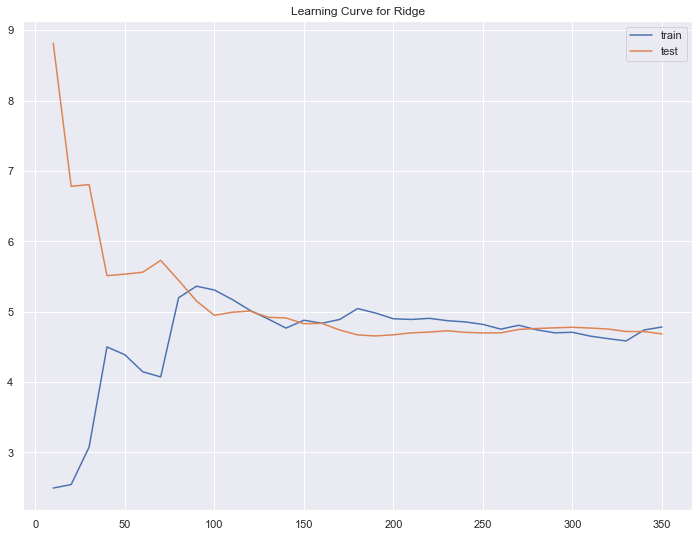

In [44]:
plot_learning_curve(reg.best_estimator_, X_train, y_train, X_test, y_test) # underfitting

In [45]:
print(f'Ridge model coef: {reg.best_estimator_.coef_}')

Ridge model coef: [-0.45123027  0.39344012  0.25400672  2.92906215 -2.33344039  3.0856106
 -0.54726938 -3.93597673  3.1830472  -1.82001743 -2.44561163  0.24629441
 -5.33835878]


In [46]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 

#Simple Linear Model
print("Simple Train: ", reg.best_estimator_.score(X_train, y_train))
print("Simple Test: ", reg.best_estimator_.score(X_test, y_test))
print('*************************')

Simple Train:  0.7423613447058086
Simple Test:  0.7054794754502515
*************************
